### Stage 1

In [1]:
import pandas as pd
pd.__version__

'0.22.0'

In [2]:
loc = 'data/2010 Federal STEM Education Inventory Data Set.xls'
df = pd.read_excel(loc, sheet_name = 0 , header = 1, skiprows = -1)
df = df.drop(df.index[252])
df.tail()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
247,PRG_0321,Research on Gender in Science and Engineering ...,National Science Foundation,Directorate for Education and Human Resources ...,The Research on Gender in Science and Engineer...,1993.0,10.130,11.400,11.570,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
248,PRG_0324,CITEAM,National Science Foundation,Office of Cyberinfrastructure (OCI),The CI-TEAM program supports local and large s...,2006.0,9.900,0.000,4.850,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
249,PRG_0325,NHLBI HBCU Research Scientist Award,Health & Human Services,"National Heart, Lung, and Blood Institute (NHLBI)",The NHLBI supports cooperative agreement grant...,2001.0,0.476,0.486,0.476,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,PRG_0326,AgDiscovery,Agriculture,APHIS,AgDiscovery is an outreach program to help stu...,NaN,NaN,NaN,0.488,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,PRG_0327,SMART Grants,Education,Office of Postsecondary Education (OPE),The National Science and Mathematics Access to...,2006.0,194.000,341.000,379.776,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [3]:
all_cols = df.columns
growth_list = ['C1) Funding FY2008', 'C2) Funding FY2009']
growth_cols = df[growth_list]

In [131]:
with open('data/columns.txt', 'w') as file:
    l = list(df)
    for i in l:
        file.write(str(i) + '\n')

In [4]:
growth_percent = growth_cols[growth_list[1]].sub(growth_cols[growth_list[0]], axis = 0 )
growth_percent = growth_percent / growth_cols[growth_list[0]] * 100
df['Growth Percent'] = growth_percent
l = ['Index Number', 'C1) Funding FY2008', 'C2) Funding FY2009', 'Growth Percent']
df[l].head()

,Index Number,C1) Funding FY2008,C2) Funding FY2009,Growth Percent
0,PRG_0001,5.24,7.19,37.213740
1,PRG_0002,14.00,14.00,0.000000
2,PRG_0003,5.00,5.00,0.000000
3,PRG_0004,4.57,11.79,157.986871
4,PRG_0005,1.63,2.74,68.098160


In [5]:
growth_tag = [1 if x > 0 else 0 for x in df['Growth Percent']]
df['Growth Tag'] = growth_tag
l = ['Index Number', 'C1) Funding FY2008', 'C2) Funding FY2009', 'Growth Percent', 'Growth Tag']
df[l].tail()

,Index Number,C1) Funding FY2008,C2) Funding FY2009,Growth Percent,Growth Tag
247,PRG_0321,10.130,11.400,12.537019,1
248,PRG_0324,9.900,0.000,-100.000000,0
249,PRG_0325,0.476,0.486,2.100840,1
250,PRG_0326,NaN,NaN,NaN,0
251,PRG_0327,194.000,341.000,75.773196,1


### Stage 2

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

In [7]:
print(df.columns)

Index(['Index Number', 'Investment Name', 'Agency', 'Subagency',
       'A) Brief Description', 'B) Year Established', 'C1) Funding FY2008',
       'C2) Funding FY2009', 'C3) Funding FY2010',
       'D) Mission-specific or General STEM?',
       ...
       'Y3) Process or Implementation Evaluation Type', 'Unnamed: 249',
       'Unnamed: 250', 'Y4) Portfolio Evaluation/Review Type', 'Unnamed: 252',
       'Unnamed: 253', 'Y5) Expert Review Type', 'Unnamed: 255',
       'Growth Percent', 'Growth Tag'],
      dtype='object', length=258)


In [247]:
def single_column_bar(tp, figsize = (10, 10)):
    to_plot = tp
    freq = df[to_plot].value_counts()
    plt.figure(figsize = figsize)
    plt.ylabel('Frequency')
    plt.title(to_plot)
    freq.plot.bar()

In [271]:
def multi_column_bar(tp, r1, r2, figsize = (10, 10)):
    to_plot = [tp]

    s = {}

    for i in range(r1, r2):
        to_plot.append('Unnamed: {}'.format(i))
    
    for p in to_plot:
        freq = df[p].dropna().value_counts()
        s[freq.index[0]] = freq.iloc[0]

    # print(to_plot)
    s = pd.Series(s)
    plt.figure(figsize = figsize)
    plt.ylabel('Frequency')
    plt.title(to_plot[0])   
    s.plot.bar()

In [272]:
def single_column_hist(tp, figsize = (10, 10)):
    to_plot = tp
    plt.figure(figsize = figsize)
    # plt.xticks(rotation='vertical')
    plt.ylabel('Frequency')
    plt.title(to_plot)
    plt.hist(df[to_plot].dropna(), rwidth = 0.8, align = 'right', bins = 100)
    plt.show()

In [273]:
def yes_no_bar(tp, figsize = (10, 10)):
    to_plot = tp
    s= {}
    s['No'] = df[to_plot].isna().sum()
    s['Yes'] = df[to_plot].size - s['No']
    s = pd.Series(s)
    plt.figure(figsize = figsize)
    plt.title(to_plot)
    s.plot.bar()

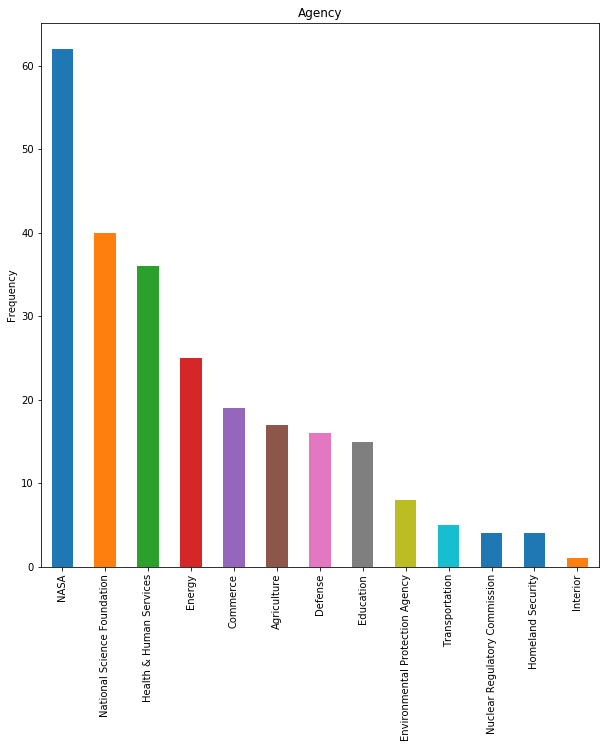

In [250]:
single_column_bar('Agency')

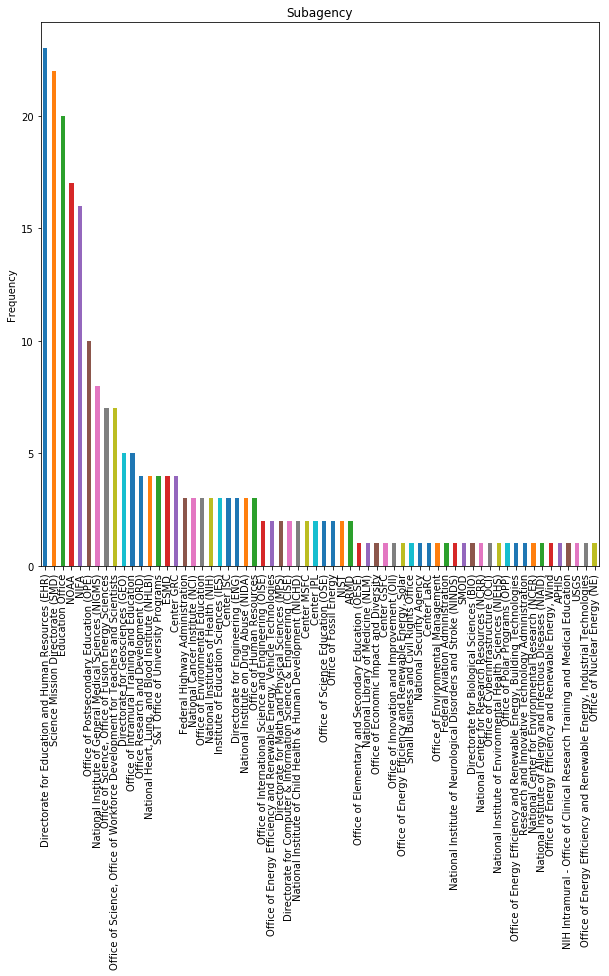

In [251]:
single_column_bar('Subagency')

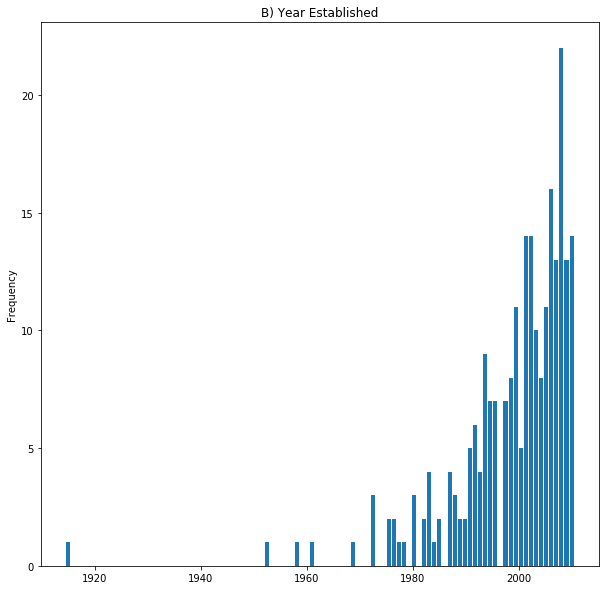

In [252]:
single_column_hist('B) Year Established')

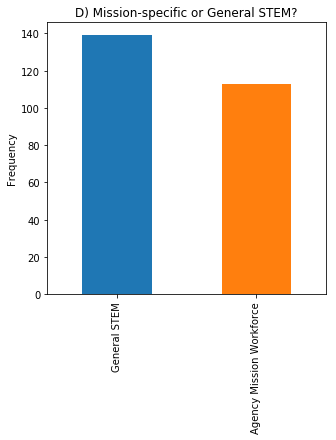

In [253]:
single_column_bar('D) Mission-specific or General STEM?', figsize = (5, 5))

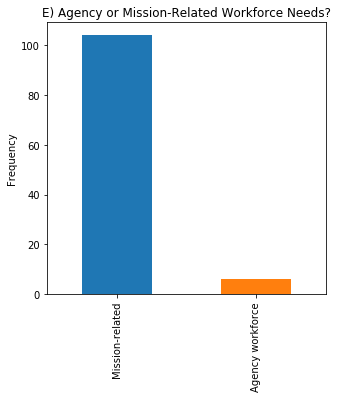

In [254]:
single_column_bar('E) Agency or Mission-Related Workforce Needs?', figsize = (5, 5))

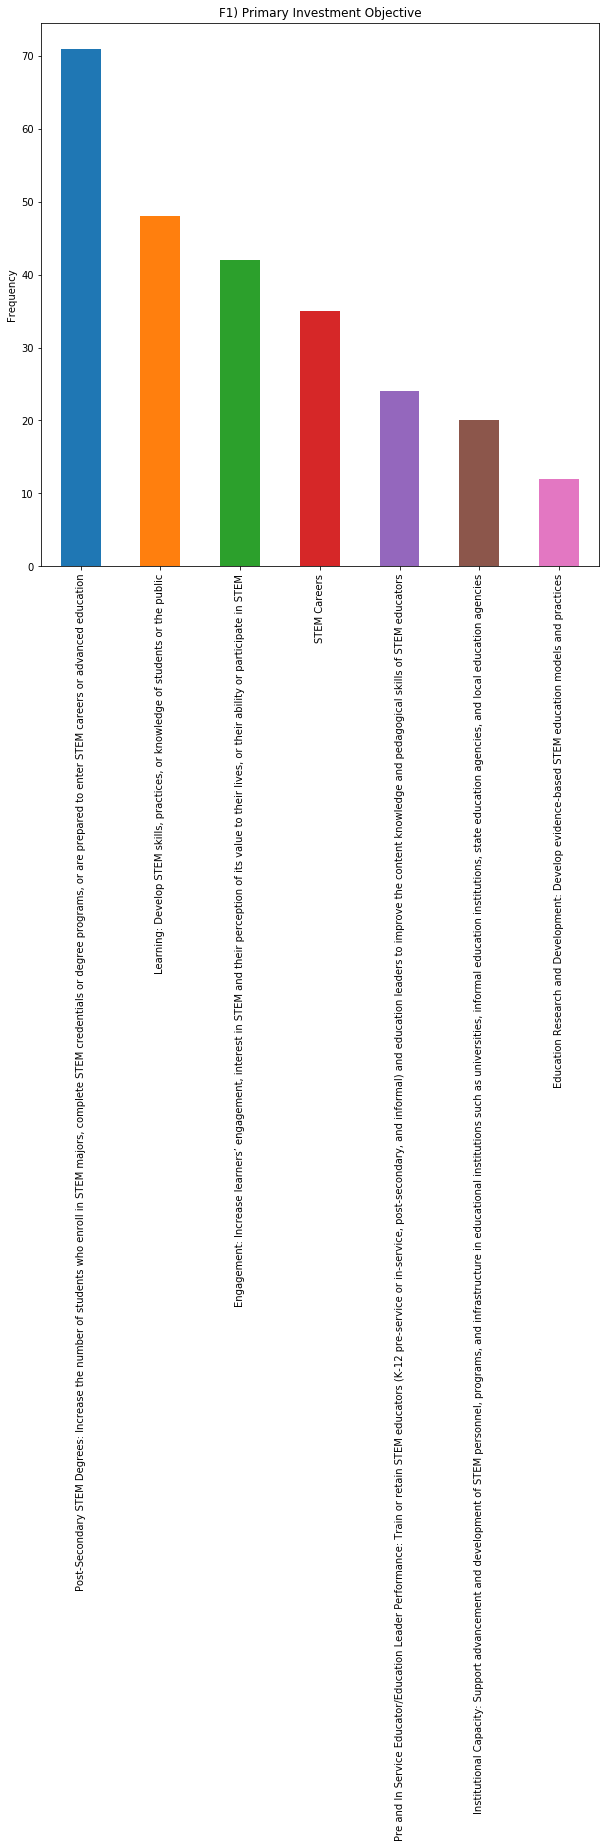

In [255]:
single_column_bar('F1) Primary Investment Objective')

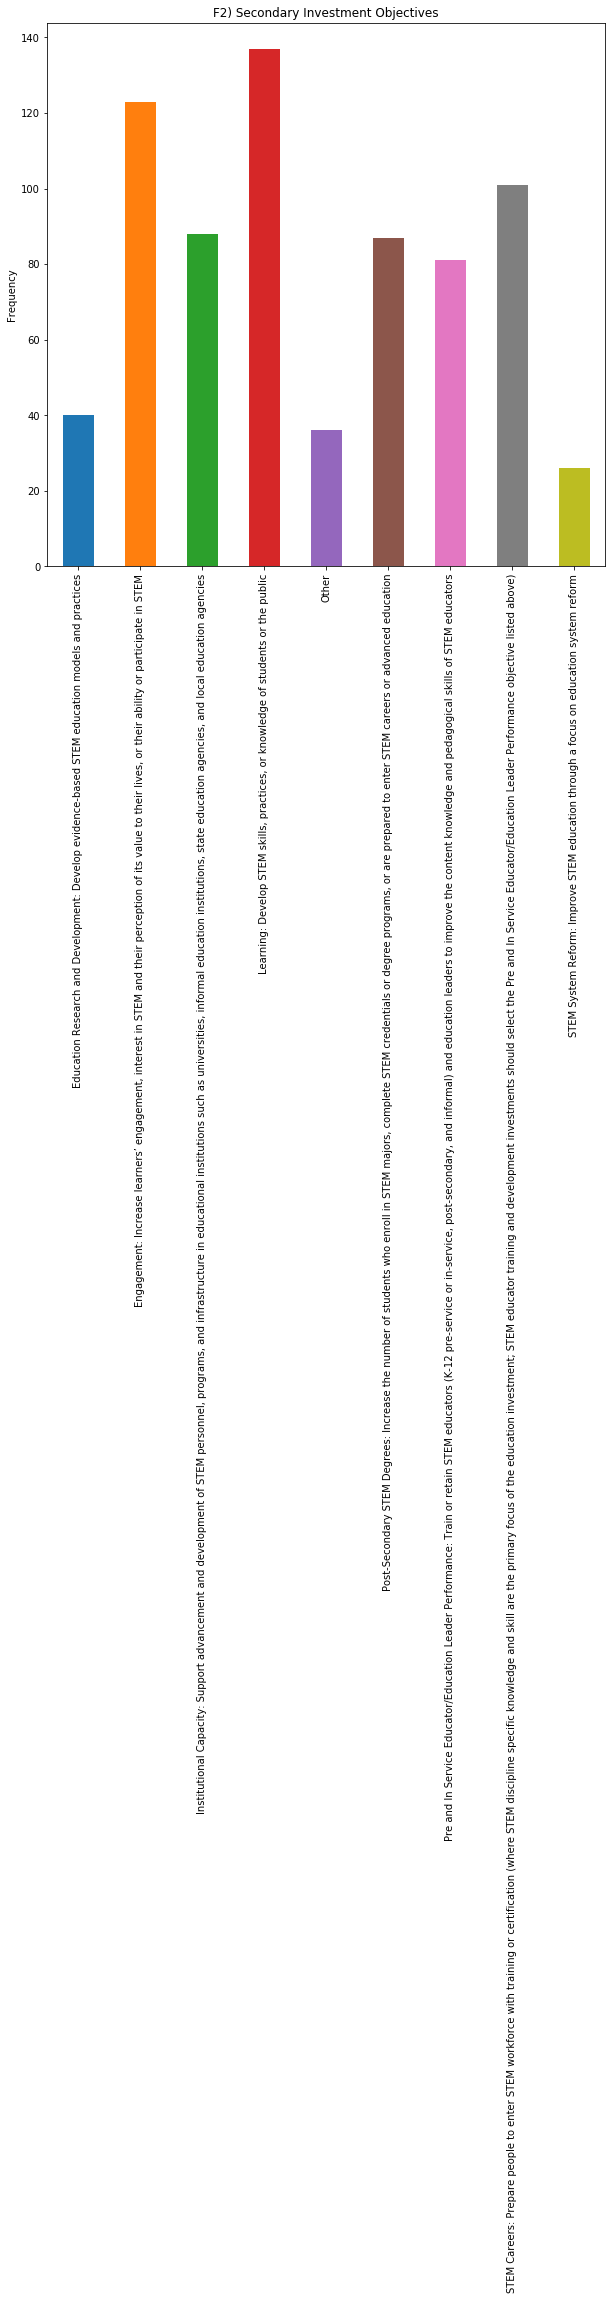

In [256]:
multi_column_bar('F2) Secondary Investment Objectives', 13, 21)

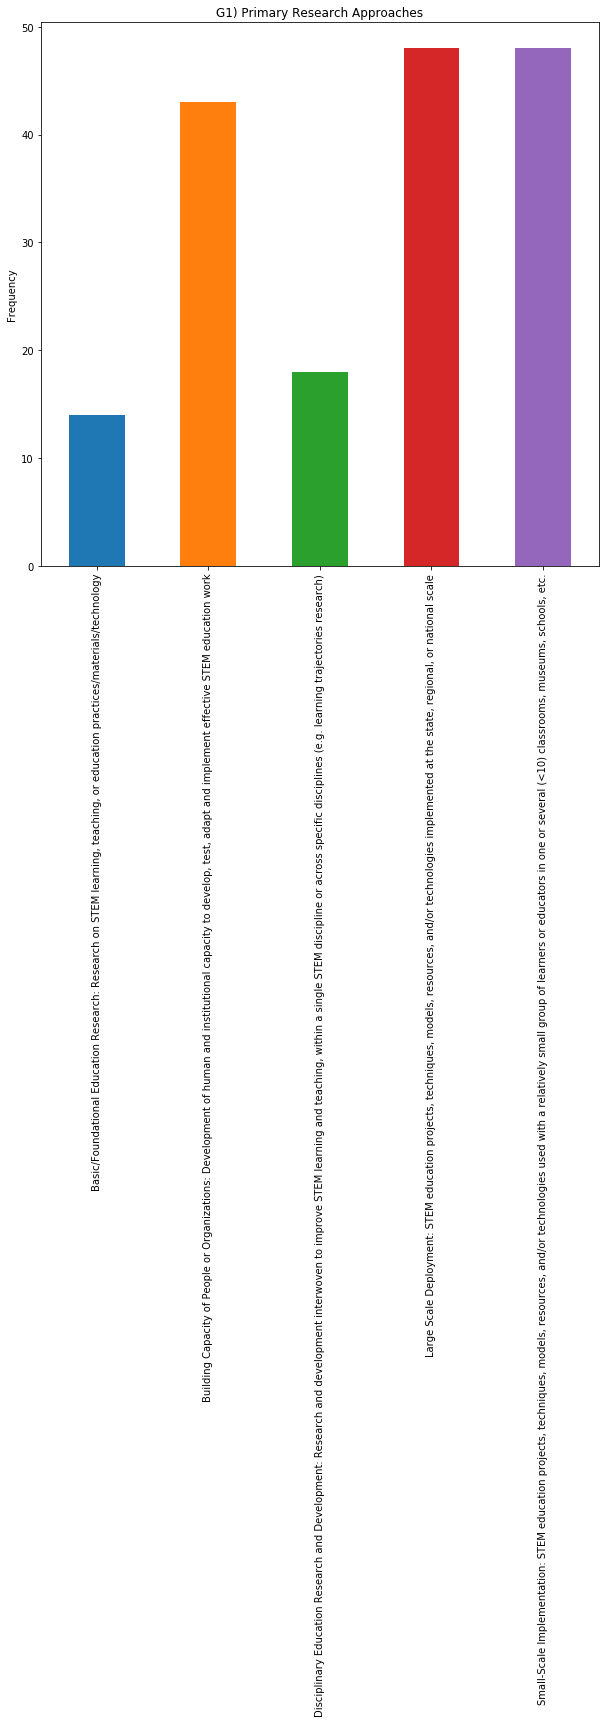

In [257]:
multi_column_bar('G1) Primary Research Approaches', 23, 27)

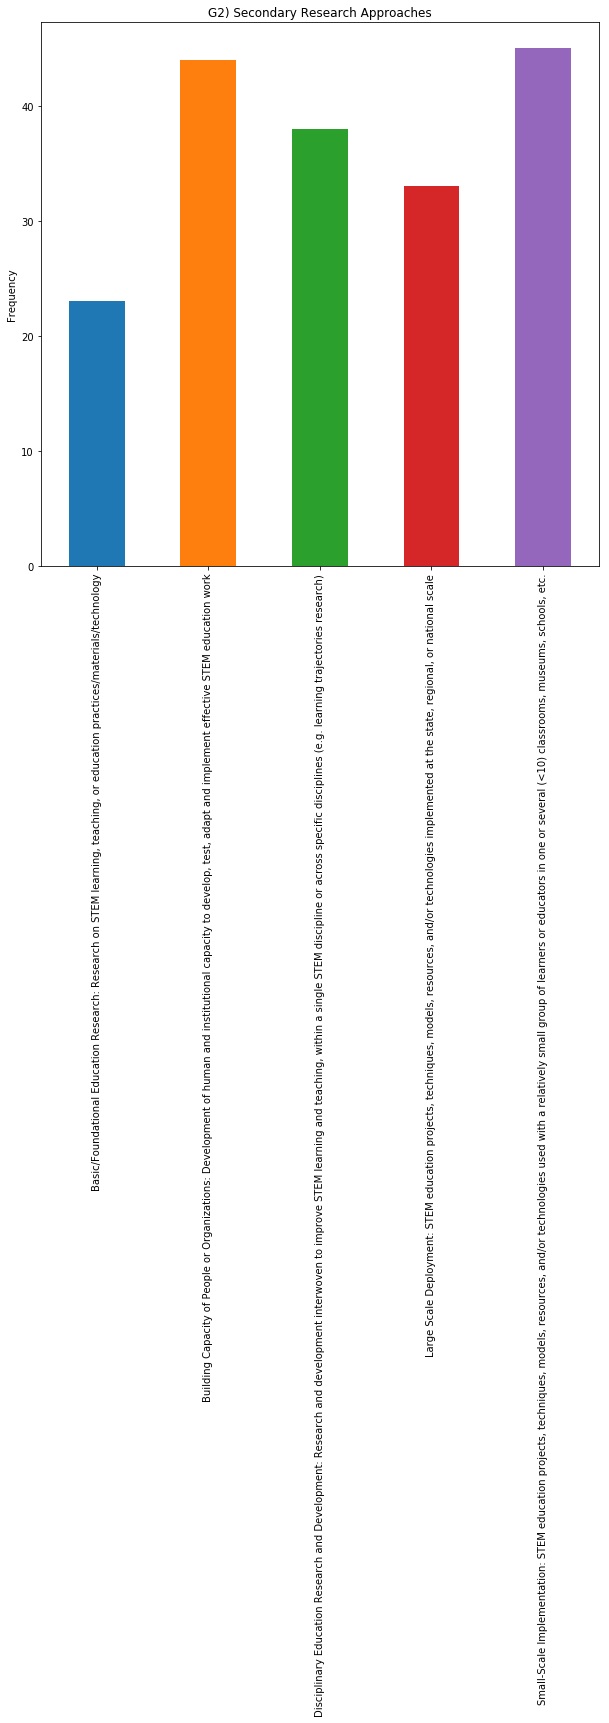

In [258]:
multi_column_bar('G2) Secondary Research Approaches', 28, 32)

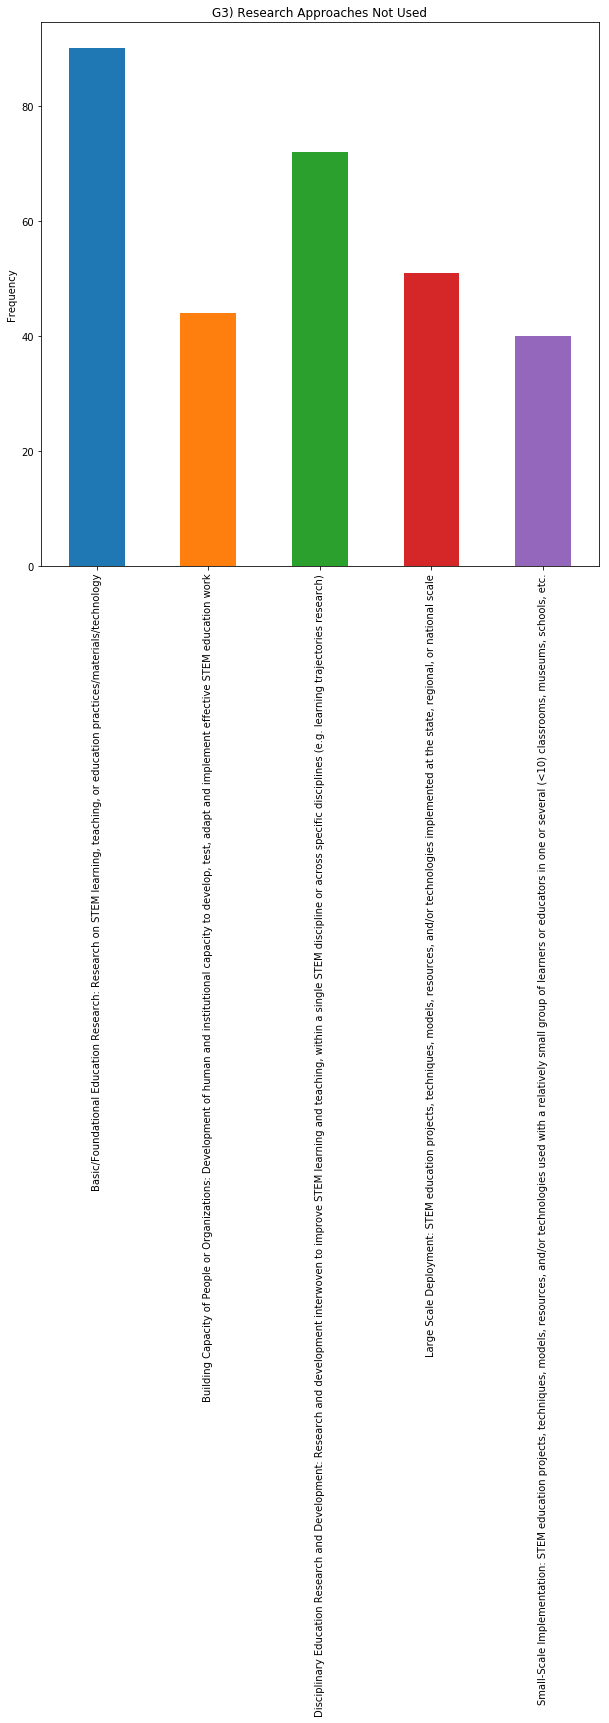

In [259]:
multi_column_bar('G3) Research Approaches Not Used', 33, 37)

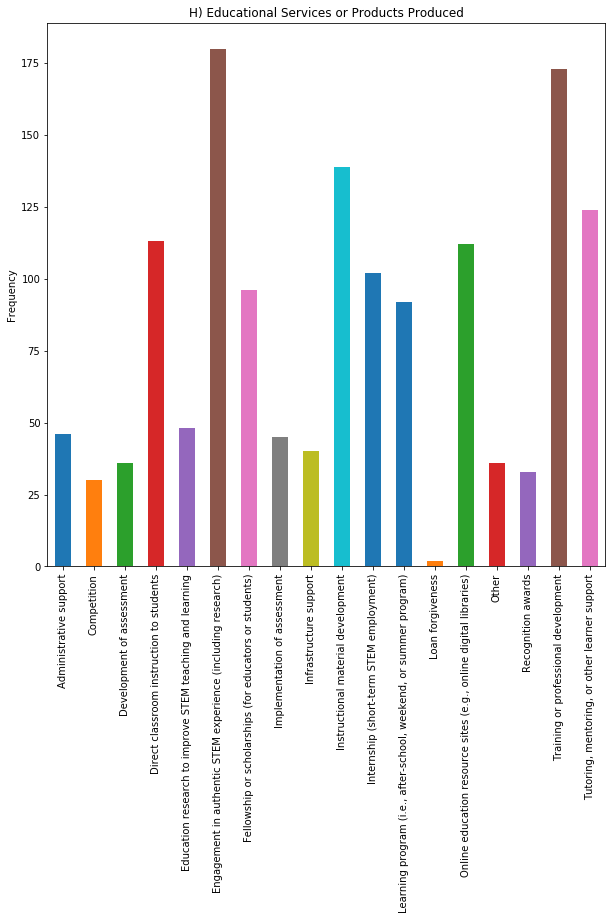

In [260]:
multi_column_bar('H) Educational Services or Products Produced', 38, 55)

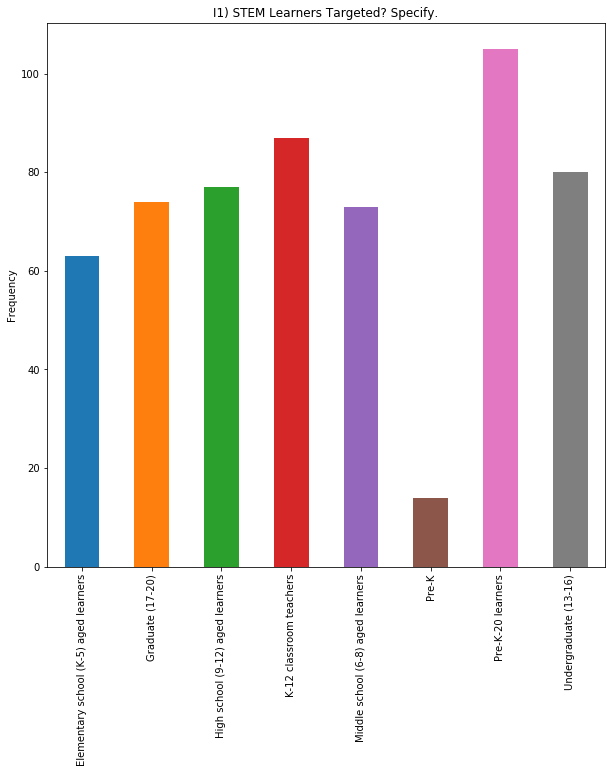

In [263]:
multi_column_bar('I1) STEM Learners Targeted? Specify.', 57, 64)

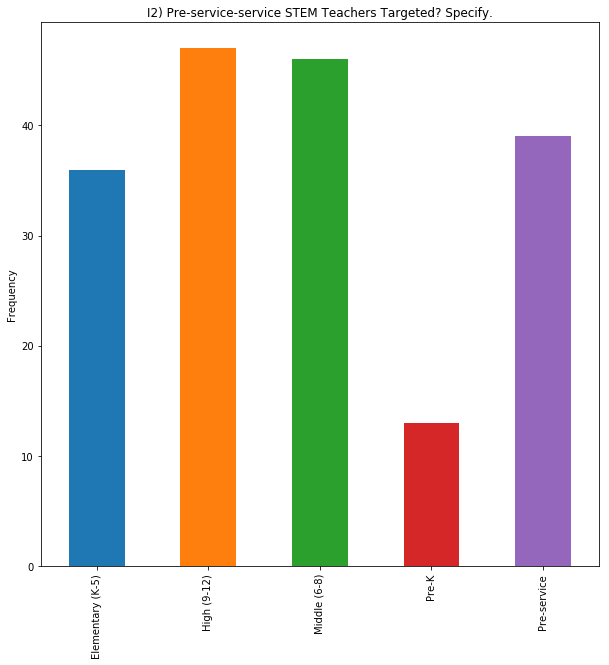

In [264]:
multi_column_bar('I2) Pre-service-service STEM Teachers Targeted? Specify.', 65, 69)

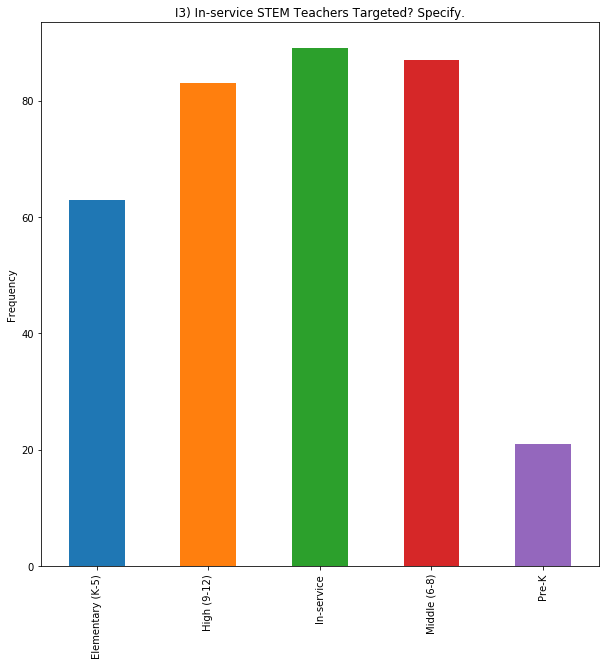

In [265]:
multi_column_bar('I3) In-service STEM Teachers Targeted? Specify.', 70, 74)

##### Incorrect Plotting for this single column attribute because of comma missing in some values, with only 1 possible value, hence modifying graph to YES / NO

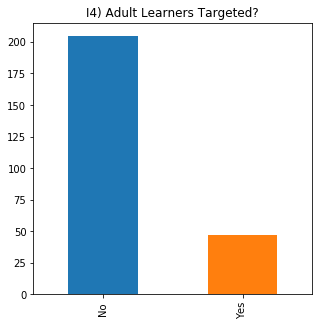

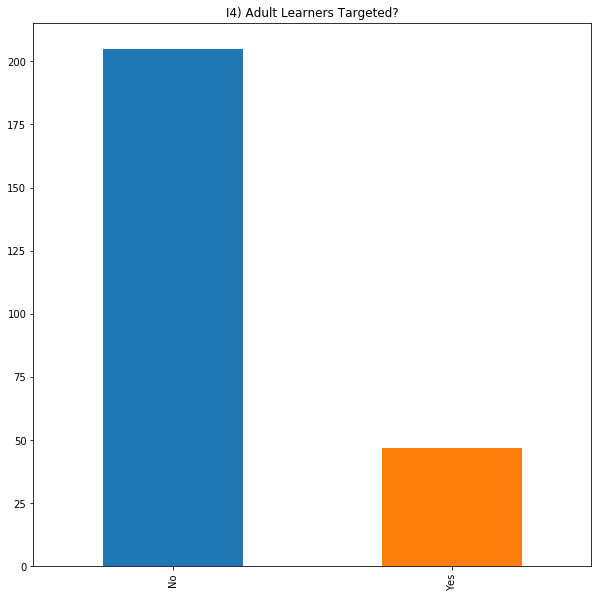

In [274]:
yes_no_bar('I4) Adult Learners Targeted?', figsize = (5, 5))

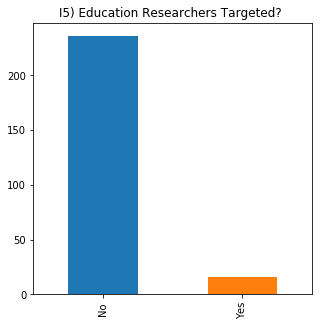

In [277]:
yes_no_bar('I5) Education Researchers Targeted? ', figsize = (5, 5))

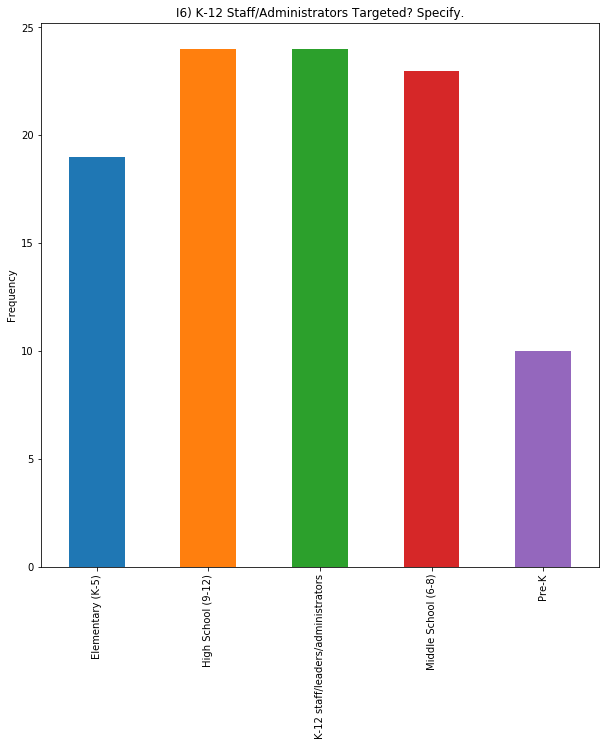

In [267]:
multi_column_bar('I6) K-12 Staff/Administrators Targeted? Specify.', 77, 81)

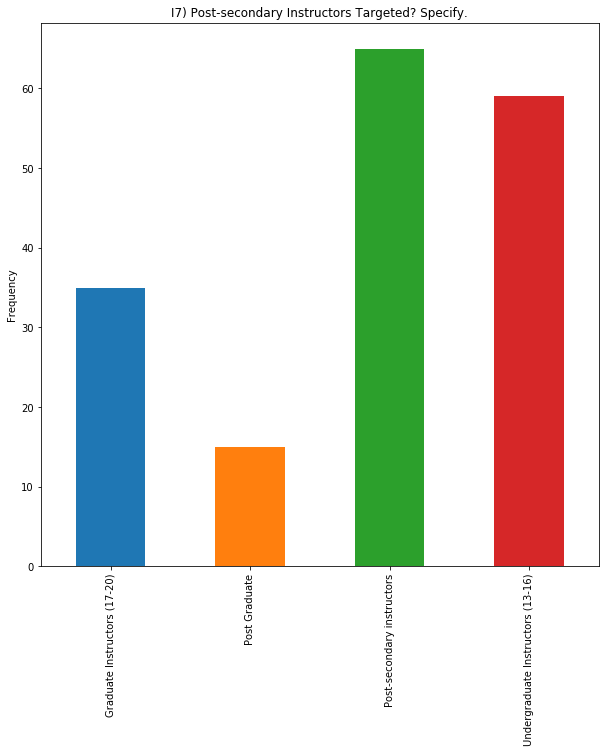

In [268]:
multi_column_bar('I7) Post-secondary Instructors Targeted? Specify.', 82, 85)

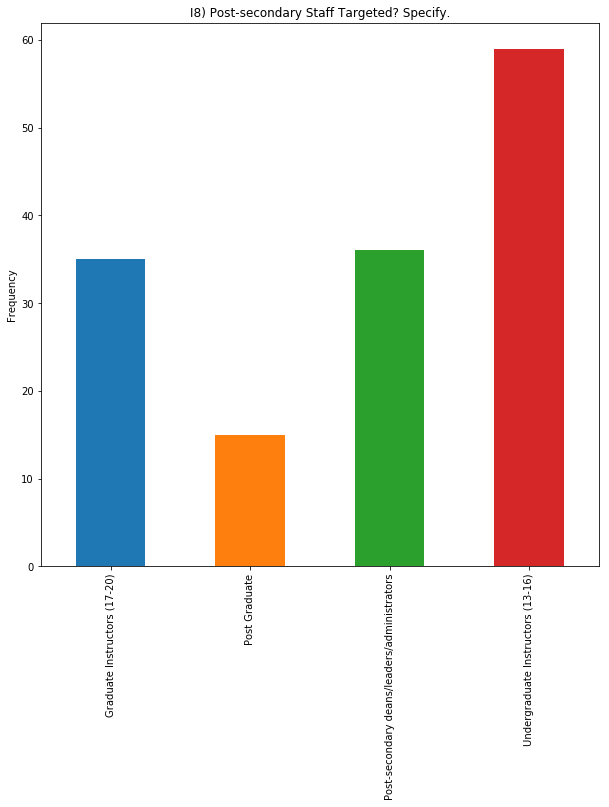

In [269]:
multi_column_bar('I8) Post-secondary Staff Targeted? Specify.', 82, 85)

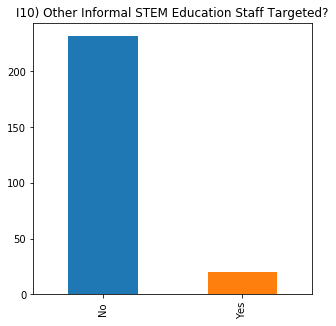

In [279]:
yes_no_bar('I10) Other Informal STEM Education Staff Targeted?', figsize=(5, 5))